# Chapter 2
I've demonstrated classification level 3 and clustering level 3 in this chapter.

**Classification**
<br>
Fit and apply classification models and select appropriate classification models for different contexts

**Clustering**
<br>
Apply multiple clustering techniques, and interpret results

In this chapter I will be looking at the same dataset I explored in *Assignment #9* previously. I'll include some of the same EDA and methods as well.

## Classification Level 3

In [134]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import classification_report,accuracy_score, silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [31]:
# Loading data
wine_data = pd.read_csv("winequality.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [32]:
wine_data.shape

(6497, 14)

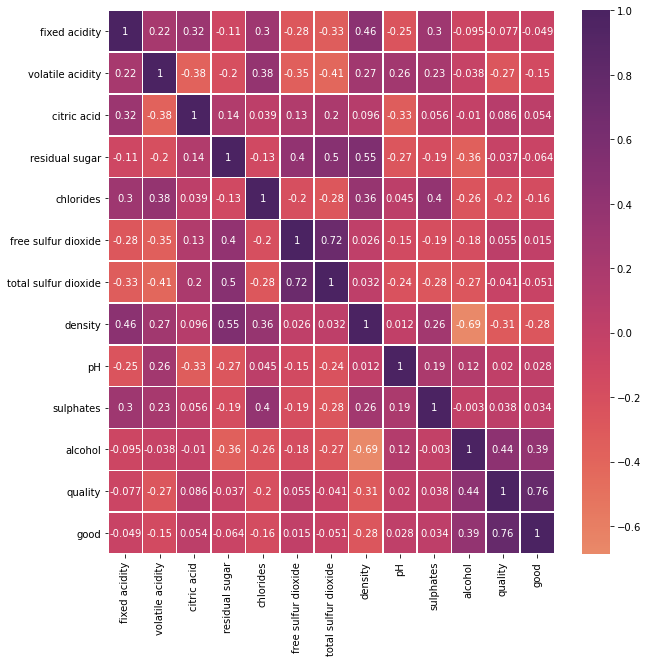

In [33]:
# Visualizations of data before
plt.figure(figsize=(10,10))
sns.heatmap(wine_data.corr(),annot=True,linewidth=0.5,center=0,cmap='flare')
plt.show()

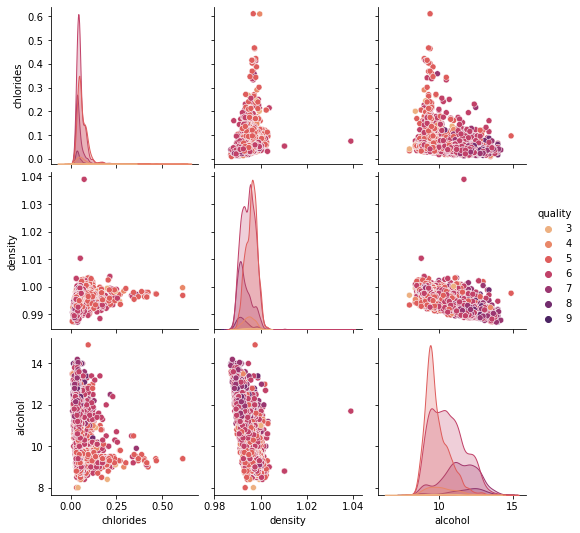

In [34]:
# More visualization
sns.pairplot(wine_data, vars=['chlorides','density', 'alcohol'], hue='quality', palette="flare")

In [35]:
# Exploring classifications: by quality
print(wine_data['quality'].unique())

[5 6 7 4 8 3 9]


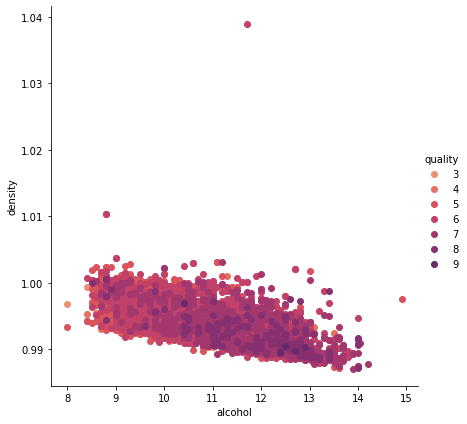

In [36]:
# More visualization of classes with qualtiy and alcohol
sns.FacetGrid(wine_data, hue="quality", height=6, palette="flare").map(plt.scatter, "alcohol", "density").add_legend()

plt.show()

In [53]:
# Encoding color as 0=white, 1=red
wine_data.color.apply(lambda x: 1 if x == "red" else 0)
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,0


In [113]:
# Separating Quality into High/Low
quality = wine_data["quality"].values
temp = []
for num in quality:
    if num<5:
        temp.append("Low")
    else:
        temp.append("High")
temp = pd.DataFrame(data=temp, columns=["ranking"])
data = pd.concat([wine_data,temp],axis=1)
data.drop(columns="quality",axis=1,inplace=True)

In [114]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good,color,ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,High
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0,High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0,High
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0,High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,High


**First Method: KNN Classification**

In [75]:
# Separating target from feature variables
X= data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [76]:
# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

        High       0.96      1.00      0.98      1245
         Low       0.25      0.02      0.03        55

    accuracy                           0.96      1300
   macro avg       0.60      0.51      0.51      1300
weighted avg       0.93      0.96      0.94      1300



Wow! The accuracy is really high with this classifier. Lets explore other options just in case.

**Second Method: Random Forest**

In [79]:
# Train, test, split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2,random_state=0)

In [84]:
# Building the forest
rfc = RandomForestClassifier()
rfc.fit(X_train2, y_train2)
pred_2 = rfc.predict(X_test2)
print(classification_report(y_test2, pred_2))

              precision    recall  f1-score   support

        High       0.96      1.00      0.98      1245
         Low       0.75      0.05      0.10        55

    accuracy                           0.96      1300
   macro avg       0.85      0.53      0.54      1300
weighted avg       0.95      0.96      0.94      1300



**Third Method: Naive Bayes**

In [90]:
# Train, test, split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2,random_state=0)

In [91]:
# Applying NB
gnb = GaussianNB()
gnb.fit(X_train3, y_train3)
y_pred3 = gnb.predict(X_test3)

In [92]:
gnb.score(X_test3,y_test3)

0.4238461538461539

In [93]:
gnb.predict_proba(X_test3)

array([[0.3303935 , 0.6696065 ],
       [0.38749251, 0.61250749],
       [0.67572222, 0.32427778],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [94]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

        High       0.99      0.40      0.57      1245
         Low       0.06      0.93      0.12        55

    accuracy                           0.42      1300
   macro avg       0.53      0.66      0.35      1300
weighted avg       0.95      0.42      0.55      1300



In [96]:
# Combining Results of Classifiers
results = pd.DataFrame({'model': ["KNN","Random Forest","Naive Bayes"],
                           'accuracies': [accuracy_score(y_test,pred_knn),accuracy_score(y_test2,pred_2),accuracy_score(y_test3,y_pred3)]})
results

,model,accuracies
0,KNN,0.956154
1,Random Forest,0.959231
2,Naive Bayes,0.423846


Based on the table above, the best classifier for the **Wine Quality** Dataset would be the **Random Forest** classifier, which has a very tiny difference between the **KNN** classifier.

## Clustering Level 3

**Method 1: Using KMeans**
<br><br>
I previously used KMeans for clustering in *Assignment #9*, so I'll briefly touch upon that now and then explore other methods.

In [139]:
# Separating target from feature variables
X= data.drop(["ranking"], axis = 1)
y=data["ranking"]

In [140]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
cent = kmeans.cluster_centers_

In [141]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, ..., 0, 1, 1])

In [142]:
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(X.columns.values))

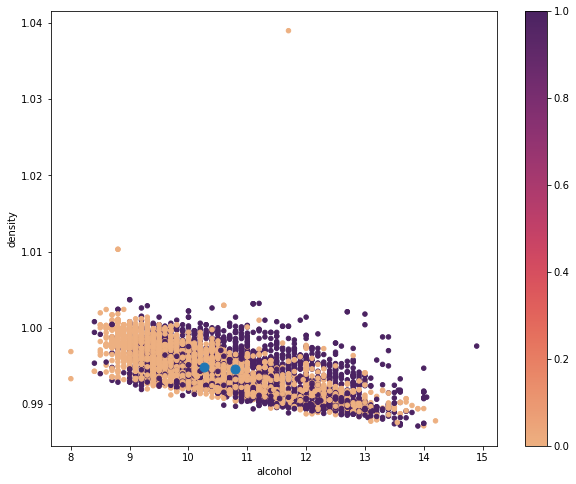

In [143]:
# Plotting relationship between alcohol and density when predicting quality of wine
fig, ax = plt.subplots(1, 1)
X.plot.scatter(x='alcohol', y='density', c= y_kmeans, figsize=(10,8), colormap='flare', ax=ax, mark_right=False)
centroids_df.plot.scatter(x='alcohol', y='density', ax = ax, s = 80, mark_right=False)

In [192]:
# Compiling different metrics
metrics1 = pd.DataFrame({'metric': ["Silhouette","Rand Score","Mutual Info"],
                           'score': [silhouette_score(X, y_kmeans),adjusted_rand_score(y, y_kmeans),adjusted_mutual_info_score(y,y_kmeans)]})
metrics1

,metric,score
0,Silhouette,0.509311
1,Rand Score,0.006000
2,Mutual Info,0.004029


**Method 2: Using Mean Shift**

In [156]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X)
msc = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

In [157]:
msc.fit(X)

MeanShift(bandwidth=42.53199221197117, bin_seeding=True)

In [158]:
labels = msc.labels_
cluster_centers = msc.cluster_centers_

In [161]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 6


In [168]:
y_msc = msc.predict(X)
y_msc

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [169]:
centroids_df = pd.DataFrame(cluster_centers, columns = list(X.columns.values))
centroids_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good,color
0,6.877979,0.293646,0.322842,5.280228,0.047034,30.496505,120.345745,0.993542,3.200878,0.495435,10.736240,0.255319,0.0
1,8.014302,0.464313,0.279279,2.597644,0.075660,14.454545,43.909091,0.995527,3.281197,0.612755,10.665817,0.161863,0.0
2,6.933333,0.338333,0.256667,3.166667,0.047667,138.666667,297.500000,0.993840,3.316667,0.496667,10.366667,0.000000,0.0
3,8.850000,0.440000,0.365000,8.625000,0.059500,43.000000,355.250000,0.997950,3.070000,0.665000,10.250000,0.000000,0.0
4,7.800000,0.965000,0.600000,65.800000,0.074000,8.000000,160.000000,1.038980,3.390000,0.690000,11.700000,0.000000,0.0


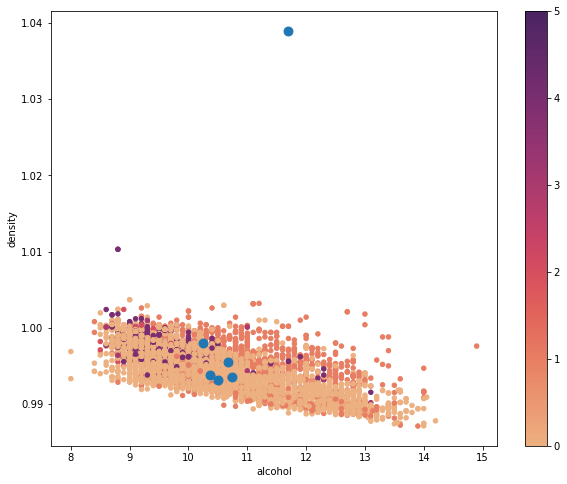

In [170]:
# Plotting relationship between alcohol and density when predicting quality of wine
fig, ax = plt.subplots(1, 1)
X.plot.scatter(x='alcohol', y='density', c= y_msc, figsize=(10,8), colormap='flare', ax=ax, mark_right=False)
centroids_df.plot.scatter(x='alcohol', y='density', ax = ax, s = 80, mark_right=False)

In [191]:
# Compiling different metrics
metrics2 = pd.DataFrame({'metric': ["Silhouette","Rand Score","Mutual Info"],
                           'score': [silhouette_score(X, y_msc),adjusted_rand_score(y, y_msc),adjusted_mutual_info_score(y,y_msc)]})
metrics2

,metric,score
0,Silhouette,0.380835
1,Rand Score,0.021655
2,Mutual Info,0.005514


**Method 3: Agglomerative Clustering**

In [177]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5)
ac.fit(X)

AgglomerativeClustering(n_clusters=5)

In [178]:
ac.labels_

array([1, 3, 1, ..., 0, 0, 3], dtype=int64)

In [183]:
y_ac = ac.fit_predict(X)

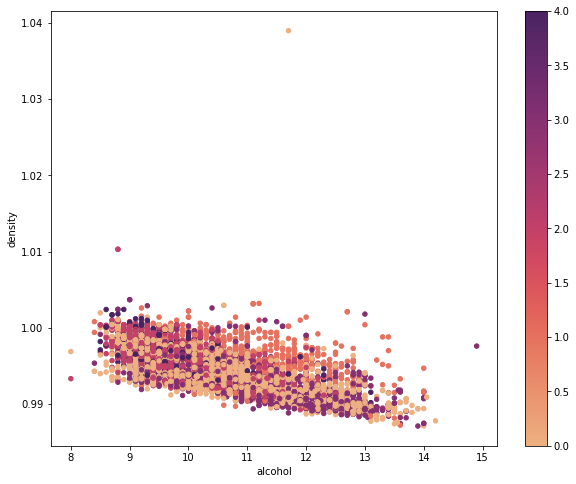

In [186]:
# Plotting relationship between alcohol and density when predicting quality of wine
fig, ax = plt.subplots(1, 1)
X.plot.scatter(x='alcohol', y='density', c= y_ac, figsize=(10,8), colormap='flare', ax=ax, mark_right=False)

In [190]:
# Compiling different metrics
metrics3 = pd.DataFrame({'metric': ["Silhouette","Rand Score","Mutual Info"],
                           'score': [silhouette_score(X, y_ac),adjusted_rand_score(y, y_ac),adjusted_mutual_info_score(y,y_ac)]})
metrics3

,metric,score
0,Silhouette,0.393223
1,Rand Score,0.004268
2,Mutual Info,0.001944


Now, I will compile all of the different accuracies, along with the scoring method used for all of the different kinds of clustering.

In [218]:
# Combining all dataframes
result1 = pd.merge(left = metrics1, right = metrics2, how='inner', on=["metric"])
result = pd.merge(left = result1, right = metrics3, how='inner', on=["metric"])
result.rename(columns={"score_x":"K-means", "score_y":"Mean Shift", "score":"Agglomerative Clustering"})

,metric,K-means,Mean Shift,Agglomerative Clustering
0,Silhouette,0.509311,0.380835,0.393223
1,Rand Score,0.006000,0.021655,0.004268
2,Mutual Info,0.004029,0.005514,0.001944


From the above table, we can see that **K-Means Clustering** had an overall better silhouette score, **Mean Shift** had a better **Mutual Info** score, and **Agg. Clustering** had a better **Rand Score**.